## 读入包

In [1]:
import jieba  #分词
import pandas as pd #处理dataframe
from gensim.models import Word2Vec #文本量化，词语-->向量
from sklearn.linear_model import LinearRegression #线性回归运算
from sklearn.model_selection import train_test_split #分训练和验证data
import matplotlib.pyplot as plt #画图
import numpy as np #代数运算
import collections
from operator import itemgetter

## 读入数据

In [2]:
SEM=pd.read_csv("/clubear/Lecture 6.3 - NLP - SEM Keyword Prediction/SEM.csv")
SEM

,kw,logImp
0,1.5折机票,2.302585
1,10.1机票,1.609438
2,10.1机票查询,1.791759
3,10.1特价机票,1.568616
4,10月份特价机票,2.036882
...,...,...
4836,最低折扣机票,3.786373
4837,最低折扣机票查询,2.826656
4838,最好的机票网站,1.845827
4839,最好的机票预订网站,1.386294


## 分词和分词处理

In [3]:
wdtrain=[];wdlist=[]
for kw in SEM.kw: #按照每一行（每一个样本）用jieba进行分词
    wd=jieba.lcut(kw)
    wdtrain.append(wd) #append是list
    wdlist=wdlist+wd #+是直接加在后面

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.798 seconds.
Prefix dict has been built successfully.


得到的wdtrain是一个包含每个样本量分词的list的list， wdlist是一个所有分词的集合。

In [4]:
tab=collections.Counter(wdlist) #找出每个分词出现的次数并以dictionary的方式储存
df = pd.DataFrame.from_dict(tab,orient="index").reset_index() #重新设置index
df = df.rename(columns={'index':'kw', 0:'count'}) #添加count column,重新以kw为index
df = df.sort_values(by='count',ascending=False) #按照分词出现的数量进行排序

In [5]:
ncov=len(df.kw) #分词数量
topkw=list(df.kw) #所有分词
mydict=dict.fromkeys(topkw)  #会造一个value是空的字典
for i in range(ncov):
    mydict[topkw[i]]=i  #在字典分词变为整数，从0开始到ncov结束
mydict 

{'机票': 0,
 '飞机票': 1,
 '特价机票': 2,
 '查询': 3,
 '预订': 4,
 '便宜': 5,
 '-': 6,
 '打折': 7,
 '特价': 8,
 '到': 9,
 '深圳': 10,
 '北京': 11,
 '航班': 12,
 '广州': 13,
 '的': 14,
 '上海': 15,
 '网站': 16,
 '预定': 17,
 '网': 18,
 '订': 19,
 '飞机': 20,
 '网上': 21,
 '订机票': 22,
 '机票价格': 23,
 '三亚': 24,
 '价格': 25,
 '订票': 26,
 '买': 27,
 '十一': 28,
 '五一': 29,
 '折扣': 30,
 '南京': 31,
 '厦门': 32,
 '订购': 33,
 '重庆': 34,
 '武汉': 35,
 '天津': 36,
 '海口': 37,
 '长沙': 38,
 '昆明': 39,
 '去': 40,
 '最': 41,
 '哈尔滨': 42,
 '多少': 43,
 '定': 44,
 '大连': 45,
 '乌鲁木齐': 46,
 '钱': 47,
 '哪个': 48,
 '杭州': 49,
 '哪里': 50,
 '旅游': 51,
 '郑州': 52,
 '长春': 53,
 '官网': 54,
 '南宁': 55,
 '济南': 56,
 '电话': 57,
 '呼和浩特': 58,
 '机票网': 59,
 '成都': 60,
 '西安': 61,
 '南昌': 62,
 '票价': 63,
 '时刻表': 64,
 '珠海': 65,
 '烟台': 66,
 '春节': 67,
 '低价': 68,
 '太原': 69,
 '端午节': 70,
 '北京机票': 71,
 '自助游': 72,
 '什么': 73,
 '西双版纳': 74,
 '沈阳': 75,
 '廉价': 76,
 '往返机票': 77,
 '哪儿': 78,
 '青岛': 79,
 '攻略': 80,
 '好': 81,
 '怎么': 82,
 '成都机票': 83,
 '放假': 84,
 '携程网': 85,
 '优惠机票': 86,
 '2013': 87,
 '西安机票': 88,
 '如何': 89,
 

In [6]:
ss=len(SEM.kw) #sample size 样本量
ncov=len(mydict) #分词数量
X=np.zeros([ss,ncov+1]) #生成一个X的0-1矩阵。如果一个关键词包含相应词根，那么对应的X元素取值为1，否则为0
for i in range(ss):
    columnID=itemgetter(*wdtrain[i])(mydict)
    X[i,columnID]=1
    X[i,ncov]=len(SEM.kw[i])    

In [18]:
ncov


506

In [7]:
X

array([[1., 0., 0., ..., 0., 0., 6.],
       [1., 0., 0., ..., 0., 0., 6.],
       [1., 0., 0., ..., 0., 0., 8.],
       ...,
       [1., 0., 0., ..., 0., 0., 7.],
       [1., 0., 0., ..., 0., 0., 9.],
       [0., 0., 0., ..., 0., 0., 5.]])

In [8]:
DIM=100 
#然后做一个word2vec模型
wvmodel = Word2Vec(wdtrain, size=DIM, min_count=1) # size表示词向量的大小，min_count表示最少的词频，低于此词频的词会被忽略掉
Z=np.zeros([ss,DIM])
for i in range(ss):
    vec=wvmodel[wdtrain[i]]
    Z[i,:]=np.mean(vec,0)

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


## 线性回归模型分析

把word2vect学习出来的空间坐标的平均值作为一个新的解释性变量Z与前面的X整合，形成新的矩阵XZ，然后做Y对XZ的回归分析，并检测外样本预测精度，外样本的预测精度其实是非常不稳定的，充满了异常值。因此，没有用均值，而是采用的中位数。

In [11]:
XZ=np.hstack((X,Z))
Y=np.array(SEM.logImp)
Y=(Y-np.mean(Y))/np.std(Y)
niter=100 #实验重复100次
R21=np.zeros(niter)
regmodel = LinearRegression() #先使用普通的线性回归模型
for i in range(niter):
    XZ0,XZ1,Y0,Y1= train_test_split(XZ,Y,test_size=0.5,random_state=i) #0%数据做训练，50%数据做验证
    regmodel.fit(XZ0,Y0)
    Yhat=regmodel.predict(XZ1)
    R21[i]=100.0*(1-np.median((Yhat-Y1)**2)) 
np.round(np.median(R21),2)

74.96

可以得到线性回归模型的MedSE的中位数是74.96
## 用深度学习模型
从网上了解到Sequential比较适合做Text分析

In [12]:
from keras.models import Sequential
from keras import layers
embedding_dim = 100

model2 = Sequential()
model2.add(layers.Embedding(ncov, embedding_dim))
model2.add(layers.Conv1D(128, 5, activation='relu'))
model2.add(layers.GlobalMaxPooling1D())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()
model2.save("./home")

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         50600     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 116,029
Trainable params: 116,029
Non-trainable params: 0
_________________________________________________________________


Embedding的参数：100 * 506 = embedding_dim * ncov<br>
Conv1D的参数：(100 * 5 +1）* 128 = 501 * 128 = 64128 , 其中5是kernel size，100是上一层遗留通道数，128是卷积核个数。 <br>
Dense1的参数：128 * 10 + 10 = 1290<br>
Dense2的参数: 10 * 1 + 1 = 11

In [13]:
from tensorflow import keras
model2 = keras.models.load_model('./home')

In [14]:
niter=100 #实验重复100次
R22=np.zeros(niter)
for i in range(niter):
    XZ0,XZ1,Y0,Y1= train_test_split(XZ,Y,test_size=0.5,random_state=i) #
    model2.fit(XZ0,Y0)
    Yhat=regmodel.predict(XZ1)
    R22[i]=100.0*(1-np.median((Yhat-Y1)**2)) 


Train on 2420 samples
2420/2420 [==============================] - 4s 2ms/sample - loss: 0.1422 - accuracy: 0.0000e+00
Train on 2420 samples
2420/2420 [==============================] - 1s 299us/sample - loss: -0.2241 - accuracy: 0.0000e+00
Train on 2420 samples
2420/2420 [==============================] - 1s 309us/sample - loss: -2.1453 - accuracy: 0.0000e+00
Train on 2420 samples
2420/2420 [==============================] - 1s 309us/sample - loss: -20.3294 - accuracy: 0.0000e+00
Train on 2420 samples
2420/2420 [==============================] - 1s 301us/sample - loss: -86.2881 - accuracy: 0.0000e+00
Train on 2420 samples
2420/2420 [==============================] - 1s 306us/sample - loss: -275.2490 - accuracy: 0.0000e+00
Train on 2420 samples
2420/2420 [==============================] - 1s 310us/sample - loss: -592.9001 - accuracy: 0.0000e+00
Train on 2420 samples
2420/2420 [==============================] - 1s 314us/sample - loss: -1459.5740 - accuracy: 0.0000e+00
Train on 2420 samp

In [15]:
np.round(np.median(R22),2)

80.73

用深度学习模型得到的MedSE的中位数是80.73

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbc958dc9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbc958cfd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbc958cfcd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbc958eae90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbc958dcf90>,
 'means': []}

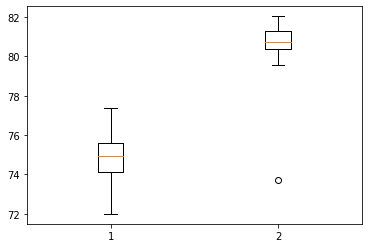

In [16]:
plt.boxplot((R21,R22))

([array([ 5., 14., 33., 30., 16.,  2.,  0.,  0.,  0.,  0.]),
  array([ 0.,  1.,  0.,  0.,  0.,  0.,  0., 10., 53., 36.])],
 array([71.99192223, 72.99737213, 74.00282203, 75.00827192, 76.01372182,
        77.01917172, 78.02462162, 79.03007152, 80.03552142, 81.04097132,
        82.04642122]),
 <a list of 2 Lists of Patches objects>)

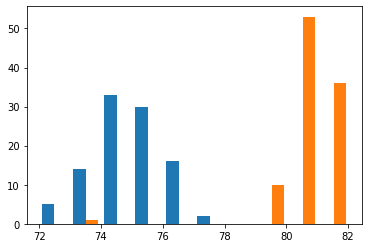

In [17]:
plt.hist((R21,R22))